<a href="https://colab.research.google.com/github/MadhumithaJM/Codsoft-/blob/main/Task_1_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 83.8MB/s]
Archive:  titanic-dataset.zip
  inflating: Titanic-Dataset.csv     
Model Accuracy: 0.8100558659217877


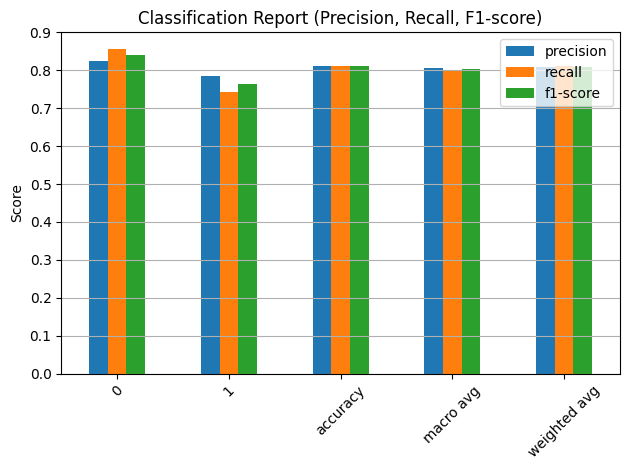

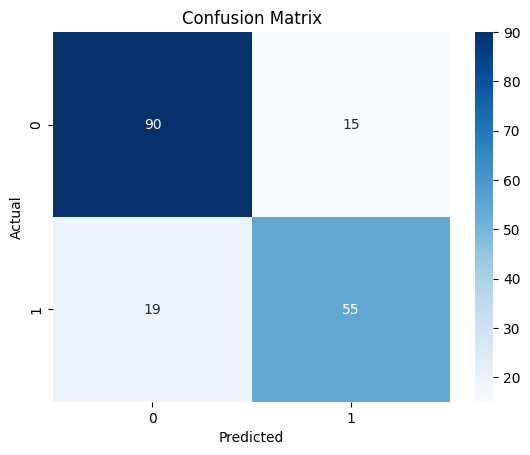

In [1]:
 !pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d yasserh/titanic-dataset
!unzip titanic-dataset.zip

import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")

df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title("Classification Report (Precision, Recall, F1-score)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()